In [84]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [85]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor

from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.filterwarnings("ignore")

In [86]:
#LOADING THE TRAIN DATASET
df_train1= pd.read_csv("/content/drive/MyDrive/ML/Data/Practice Tests/train_F3fUq2S.csv")
df_train=df_train1.copy()
print("Train Data set : \n")
df_train.head()

Train Data set : 



,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,...,is_image,is_personalised,is_quote,is_timer,is_emoticons,is_discount,is_price,is_urgency,target_audience,click_rate
0,1,3,76,10439,39,5,1,Noon,6,26,...,0,0,0,0,0,0,0,0,14,0.103079
1,2,3,54,2570,256,5,1,Morning,2,11,...,0,0,0,0,0,0,0,0,10,0.700000
2,3,3,59,12801,16,5,1,Noon,2,11,...,1,0,1,0,0,0,0,0,16,0.002769
3,4,3,74,11037,30,4,0,Evening,15,9,...,0,0,0,0,0,0,0,0,10,0.010868
4,5,3,80,10011,27,5,1,Noon,6,26,...,0,0,1,0,0,0,0,0,14,0.142826


In [87]:
#LOADING THE TEST DATASET
df_test1 = pd.read_csv("/content/drive/MyDrive/ML/Data/Practice Tests/test_Bk2wfZ3.csv")
df_test=df_test1.copy()
print("Test Data set : \n")
df_test.head()

Test Data set : 



,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,...,mean_CTA_len,is_image,is_personalised,is_quote,is_timer,is_emoticons,is_discount,is_price,is_urgency,target_audience
0,1889,3,61,12871,11,6,1,Noon,6,26,...,37,1,0,0,0,1,0,0,0,14
1,1890,3,54,2569,256,5,1,Morning,2,11,...,22,0,0,0,0,0,0,0,0,10
2,1891,3,88,1473,78,4,0,Evening,2,11,...,22,1,0,1,0,0,0,0,0,10
3,1892,3,88,1473,78,3,0,Evening,2,11,...,22,1,0,1,0,0,0,0,0,10
4,1893,3,78,9020,29,3,0,Noon,6,26,...,40,0,0,0,0,0,0,0,0,14


In [88]:
#CHECKING FOR ANY NULL VALUES
special_char=['!','@',"$",'%','^','&',"*","(",')','-',"<",'>','?','/',':',';',',']
df_train.replace(special_char, np.nan, inplace=True)                     #converting special character if exist into nan values
df_train.isnull().sum()

campaign_id           0
sender                0
subject_len           0
body_len              0
mean_paragraph_len    0
day_of_week           0
is_weekend            0
times_of_day          0
category              0
product               0
no_of_CTA             0
mean_CTA_len          0
is_image              0
is_personalised       0
is_quote              0
is_timer              0
is_emoticons          0
is_discount           0
is_price              0
is_urgency            0
target_audience       0
click_rate            0
dtype: int64

**No Null values exhibits in the data. We can process further.**

**DATA VISUALISATION**

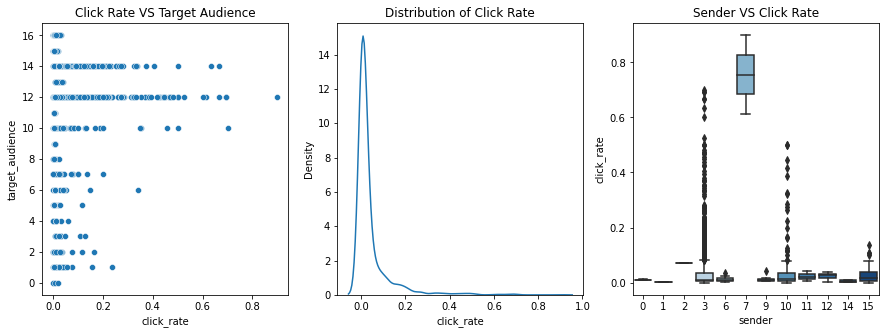

In [89]:
figure, ax= plt.subplots(1,3, figsize=(15,5))

sns.scatterplot(df_train["click_rate"], df_train["target_audience"], palette="Blues", ax=ax[0])
sns.kdeplot(df_train["click_rate"], palette="Blues", ax=ax[1])
sns.boxplot( x=df_train["sender"],y=df_train["click_rate"],  palette="Blues", ax=ax[2])

ax[0].set_title("Click Rate VS Target Audience")

ax[1].set_title("Distribution of Click Rate")

ax[2].set_title("Sender VS Click Rate")
plt.show()

**INTERPRETATION : 1. Audience cluster number 12 has maximum number of clicks with having highest click rate.**

**2. Click rate has right skwed data.**

**3. Sender 7  has highest conversion of mails into click and hence has highest CTR.**

In [90]:
#CHECKING THE DATATYPES
df_train.dtypes

campaign_id             int64
sender                  int64
subject_len             int64
body_len                int64
mean_paragraph_len      int64
day_of_week             int64
is_weekend              int64
times_of_day           object
category                int64
product                 int64
no_of_CTA               int64
mean_CTA_len            int64
is_image                int64
is_personalised         int64
is_quote                int64
is_timer                int64
is_emoticons            int64
is_discount             int64
is_price                int64
is_urgency              int64
target_audience         int64
click_rate            float64
dtype: object

In [91]:
df= pd.get_dummies(df_train["times_of_day"])          #creating dummy variables of train dataset in the place of "times of day"
df_train= pd.concat([df_train, df], axis=1).reindex(df_train.index)
df_train.drop(["times_of_day","campaign_id"] ,axis=1, inplace=True)


df= pd.get_dummies(df_test["times_of_day"])            #creating dummy variables of test dataset in the place of "times of day"
df_test= pd.concat([df_test, df], axis=1).reindex(df_test.index)
df_test.drop(["times_of_day","campaign_id"] ,axis=1, inplace=True)

**INTERPRETATION : Dummy technique is used to convert categorical data into numerical due to non linear values exhibits in the categorical feature - "times_of_day"**

In [92]:
#SHAPE OF GIVEN TEST AND TRAIN DATASET 

print("The size of Train data is {} \nand the size of Test dataset is {}".format({df_train.shape}, {df_test.shape}))

The size of Train data is {(1888, 23)} 
and the size of Test dataset is {(762, 22)}


**INTERPRETATION : Given Train and Test datasets are divided into the ratio of 60:40 where 60% of data are belongs to Train dataset and rest 40% belongs to test dataset.**

In [93]:
Features =[]
scores=[] 
columns = df_train.columns
for col in columns:
  if col=="click_rate":
    continue
  else:
    lm = LinearRegression()
    lm.fit(df_train[[col]], df_train["click_rate"])
    scores.append(lm.score(df_train[[col]], df_train["click_rate"]))       #using score method to find correlated ranked features
    Features.append(col)

high_scores= pd.concat([pd.DataFrame(Features, columns=["Features"]), pd.DataFrame(scores, columns= ["Scores"])], axis=1)
high_scores.sort_values("Scores", ascending=False, inplace=True, ignore_index=True)

high_scores   #CONSIDERING TOP RANKED CORELLATED FEATURES FOR FURTHER ANALYSIS

,Features,Scores
0,body_len,0.061437
1,subject_len,0.032452
2,mean_paragraph_len,0.031699
3,no_of_CTA,0.029803
4,category,0.028142
5,Evening,0.022003
6,product,0.014787
7,Morning,0.014248
8,is_urgency,0.013061
9,is_weekend,0.013028


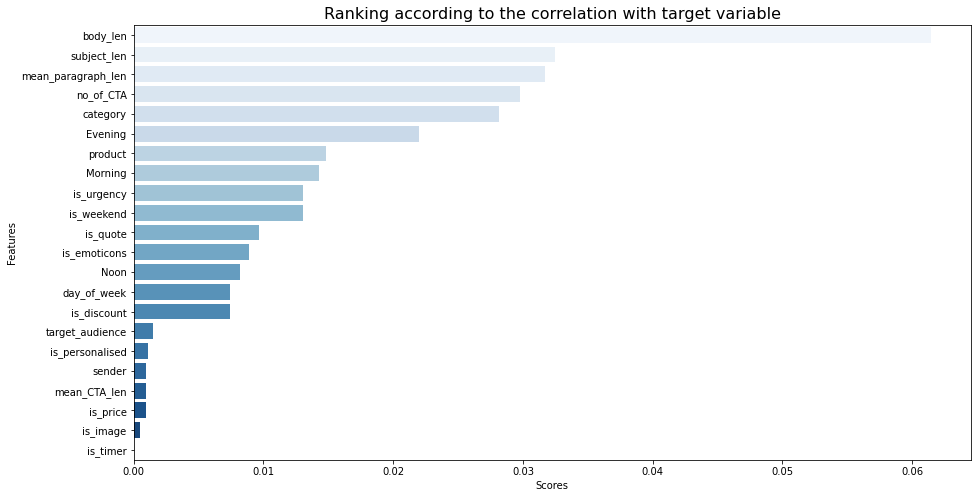

In [94]:
# Barplot for Ranking of features
plt.figure(figsize=(15,8))
sns.barplot( high_scores["Scores"], high_scores["Features"], palette = "Blues")
plt.title("Ranking according to the correlation with target variable", fontsize = 16)
plt.show()

**INTERPRETATION : As all features has correlation ranking with target variable "Click_rate" except timer so except the timer we are considering all the features of the processed train set.**

In [95]:
#DATA SPLITTING (60:40 ratio via train_test_split technique)

X = df_train[high_scores.Features[:22]]
y= df_train["click_rate"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.403, random_state=1)     #taking test size as 0.403 as given train and test data is divided into 60:40 ratio 

print("The shape of Train Data is {} \nand Test Data is {}".format({X_train.shape}, {X_test.shape}))

The shape of Train Data is {(1127, 22)} 
and Test Data is {(761, 22)}


**MODELLING USING REGRESSION METHOD**

In [96]:
model_linear= LinearRegression().fit(X_train, y_train)     #USING LINEAR REGRESSION MODEL
y_pred= model_linear.predict(X_test)

print("The R2 score of Linear regression model : ", r2_score(y_test, y_pred))

The R2 score of Linear regression model :  0.12633632368958714


In [97]:
model_random= RandomForestRegressor(n_estimators=100)      #USING RANDOM FOREST REGRESSION MODEL
model_random.fit(X_train, y_train)
y_pred= model_random.predict(X_test)
# R squared value
print("The R2 score of Random Forest regression model : ",r2_score(y_test, y_pred))

The R2 score of Random Forest regression model :  0.5493695275210297


In [98]:
model_decision= DecisionTreeRegressor(max_depth=3)
model_decision.fit(X_train, y_train)                        #USING DECISSION TREE REGRESSION MODEL
y_pred= model_decision.predict(X_test)

# R squared value
print("The R2 score of Decision Tree regression model : ",r2_score(y_test, y_pred))

The R2 score of Decision Tree regression model :  0.04161670511812765


In [99]:
#USING CROSS VALIDATION TECHNIQUE FOR MODEL SELECTION

print("Linear Regression Model R2 Scores = ",cross_val_score(LinearRegression(),X_train, y_train, cv=5, scoring="r2"))
print("Decison Tree Model R2 Scores = ",cross_val_score(DecisionTreeRegressor(),X_train, y_train, cv=5))
print("Random Forest Model R2 Scores = ",cross_val_score(RandomForestRegressor(),X_train, y_train, cv=5))
print("Lasso Model R2 Scores = ",cross_val_score(Lasso(),X_train, y_train, cv=5))
print("KNeighborsRegressor Model R2 Scores = ",cross_val_score(KNeighborsRegressor(),X_train, y_train, cv=5))


Linear Regression Model R2 Scores =  [ 0.17293391  0.15269266  0.15036063 -0.04277661  0.12056429]
Decison Tree Model R2 Scores =  [-0.18493275 -0.40521055  0.12213677 -0.51573768 -0.27923979]
Random Forest Model R2 Scores =  [0.4826824  0.40489738 0.41831818 0.1445228  0.30522535]
Lasso Model R2 Scores =  [ 0.06883745  0.09531576  0.08933516 -0.02132903  0.0570485 ]
KNeighborsRegressor Model R2 Scores =  [0.178379   0.03878165 0.09397418 0.10662229 0.15515695]


**CONCLUSION : From the above R2 scores we interpret that Random Forest Regressor is good model among the all regression models giving the R2 score of 0.5** 

**Finding the prediction for the given test data:**

In [100]:
y_predict_test= model_random.predict(df_test)   #using the final Random Forest regression model to predict the target variable "click_rate"

df= pd.concat([df_test1["campaign_id"], pd.DataFrame(y_predict_test, columns= ["click_rate"])], axis=1 )
df

,campaign_id,click_rate
0,1889,0.167659
1,1890,0.187027
2,1891,0.187062
3,1892,0.187362
4,1893,0.179580
...,...,...
757,2646,0.134425
758,2647,0.204111
759,2648,0.132241
760,2649,0.203978


In [102]:
df.to_csv('my_submission.csv', index=False)